<a href="https://colab.research.google.com/github/yakimsanik/belhard/blob/master/HW6/Yakim_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install plotly

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [2]:
# Загрузка данных
df = pd.read_csv('marketing_campaign_dataset.csv')

In [3]:
# Первичный обзор
print(df.head())
print(df.info())

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  Language  \
0   Google Ads             0.04       $16,174.00  6.29      Chicago   Spanish   
1   Google Ads             0.12       $11,566.00  5.61     New York    German   
2      YouTube             0.07       $10,200.00  7.18  Los Angeles    French   
3      YouTube             0.11       $12,724.00  5.55        Miami  Mandarin   
4      YouTube             0.05       $16,452.00  6.50  Los Angeles  Mandarin   

   Clicks  Impressions  Engagement_Score    

Описание колонок

1.   Campaign_ID: Уникальный идентификатор кампании.
2.   Company: Название компании, проводящей кампанию.
3.   Campaign_Type: Тип кампании (Email, Influencer, Display).
4.   Target_Audience: Целевая аудитория.
5.   Duration: Продолжительность кампании (например, 30 дней).
6.   Channel_Used: Канал, использованный для продвижения
7.   Conversion_Rate: Коэффициент конверсии
8.   Acquisition_Cost: Стоимость привлечения клиента
9.   ROI: Возврат на инвестиции (отношение прибыли к затратам).
10.  Location: Географическое местоположение целевой аудитории.
11.  Language: Язык, на котором проводилась кампания.
12.  Clicks: Количество кликов по рекламе.
13.  Impressions: Количество показов рекламы.
14.  Engagement_Score: Оценка вовлеченности
15.  Customer_Segment: Сегмент клиентов, на который направлена кампания.
16.  Date: Дата начала кампании.



In [12]:
# Статистический обзор
print(df.describe())

        Campaign_ID  Conversion_Rate           ROI        Clicks  \
count  31013.000000     31013.000000  31013.000000  31013.000000   
mean   15507.000000         0.080207      5.003652    547.633799   
std     8952.826286         0.040816      1.735197    259.887556   
min        1.000000         0.010000      2.000000    100.000000   
25%     7754.000000         0.050000      3.500000    323.000000   
50%    15507.000000         0.080000      5.000000    546.000000   
75%    23260.000000         0.120000      6.510000    773.000000   
max    31013.000000         0.150000      8.000000   1000.000000   

        Impressions  Engagement_Score  
count  31013.000000      31013.000000  
mean    5498.924387          5.513172  
std     2599.645592          2.871770  
min     1000.000000          1.000000  
25%     3259.000000          3.000000  
50%     5503.000000          6.000000  
75%     7756.000000          8.000000  
max    10000.000000         10.000000  


In [13]:
# Проверка пропусков
print(df.isnull().sum())

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64


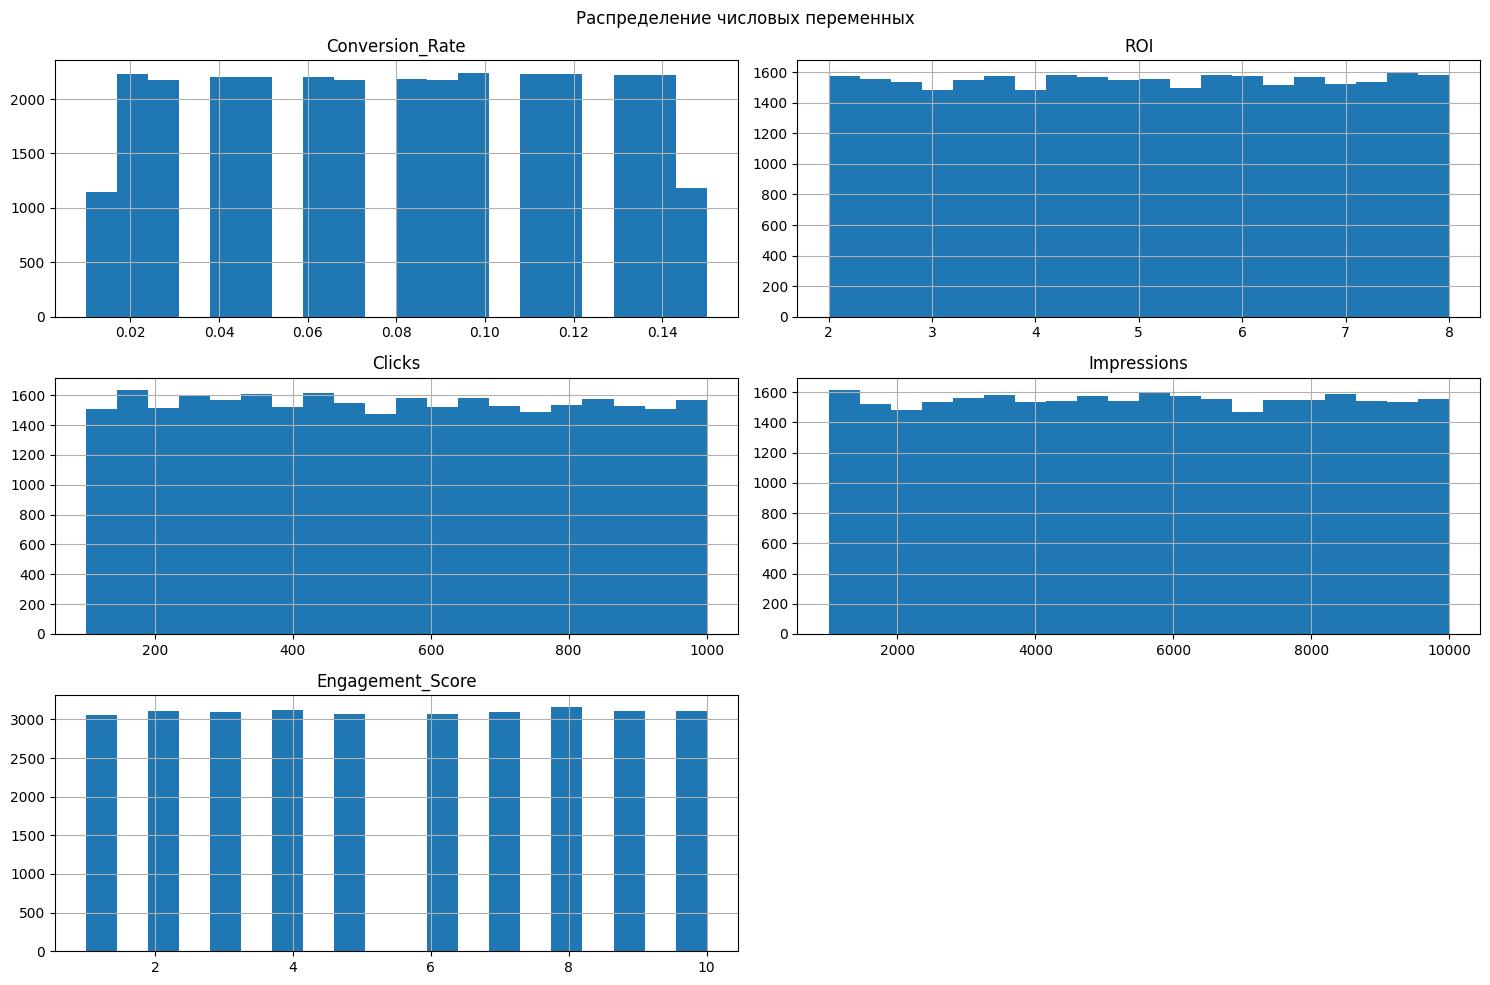

In [14]:
# Визуализация распределения числовых переменных
num_cols = ['Duration', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']
df[num_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Распределение числовых переменных')
plt.tight_layout()
plt.show()

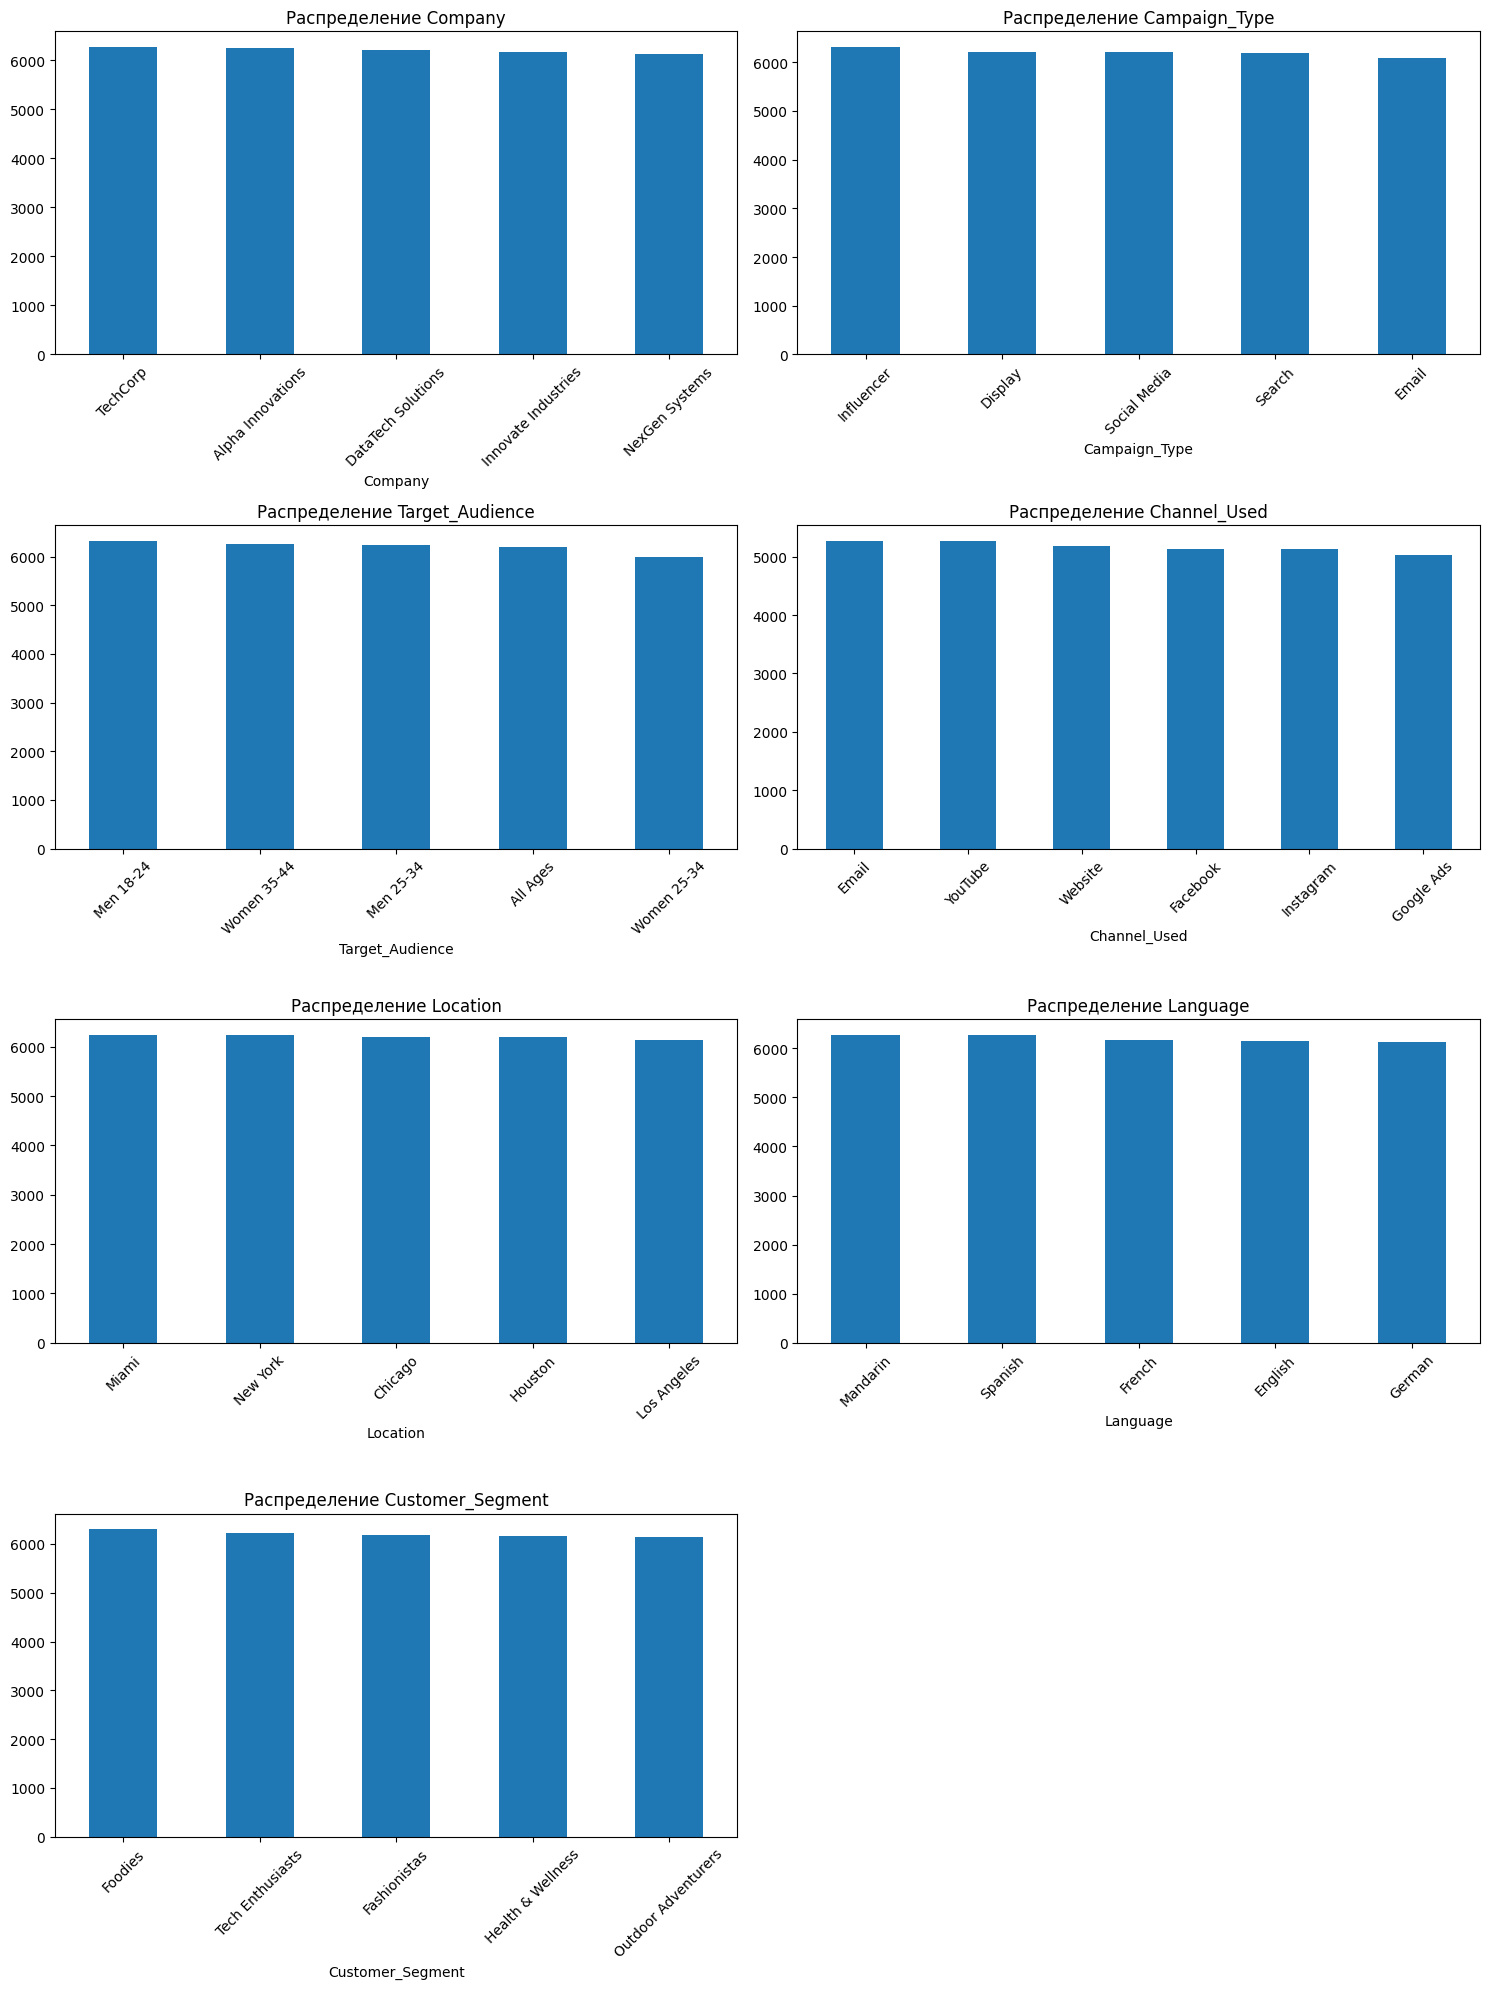

In [15]:
# Анализ категориальных переменных
cat_cols = ['Company', 'Campaign_Type', 'Target_Audience', 'Channel_Used', 'Location', 'Language', 'Customer_Segment']

plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Распределение {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

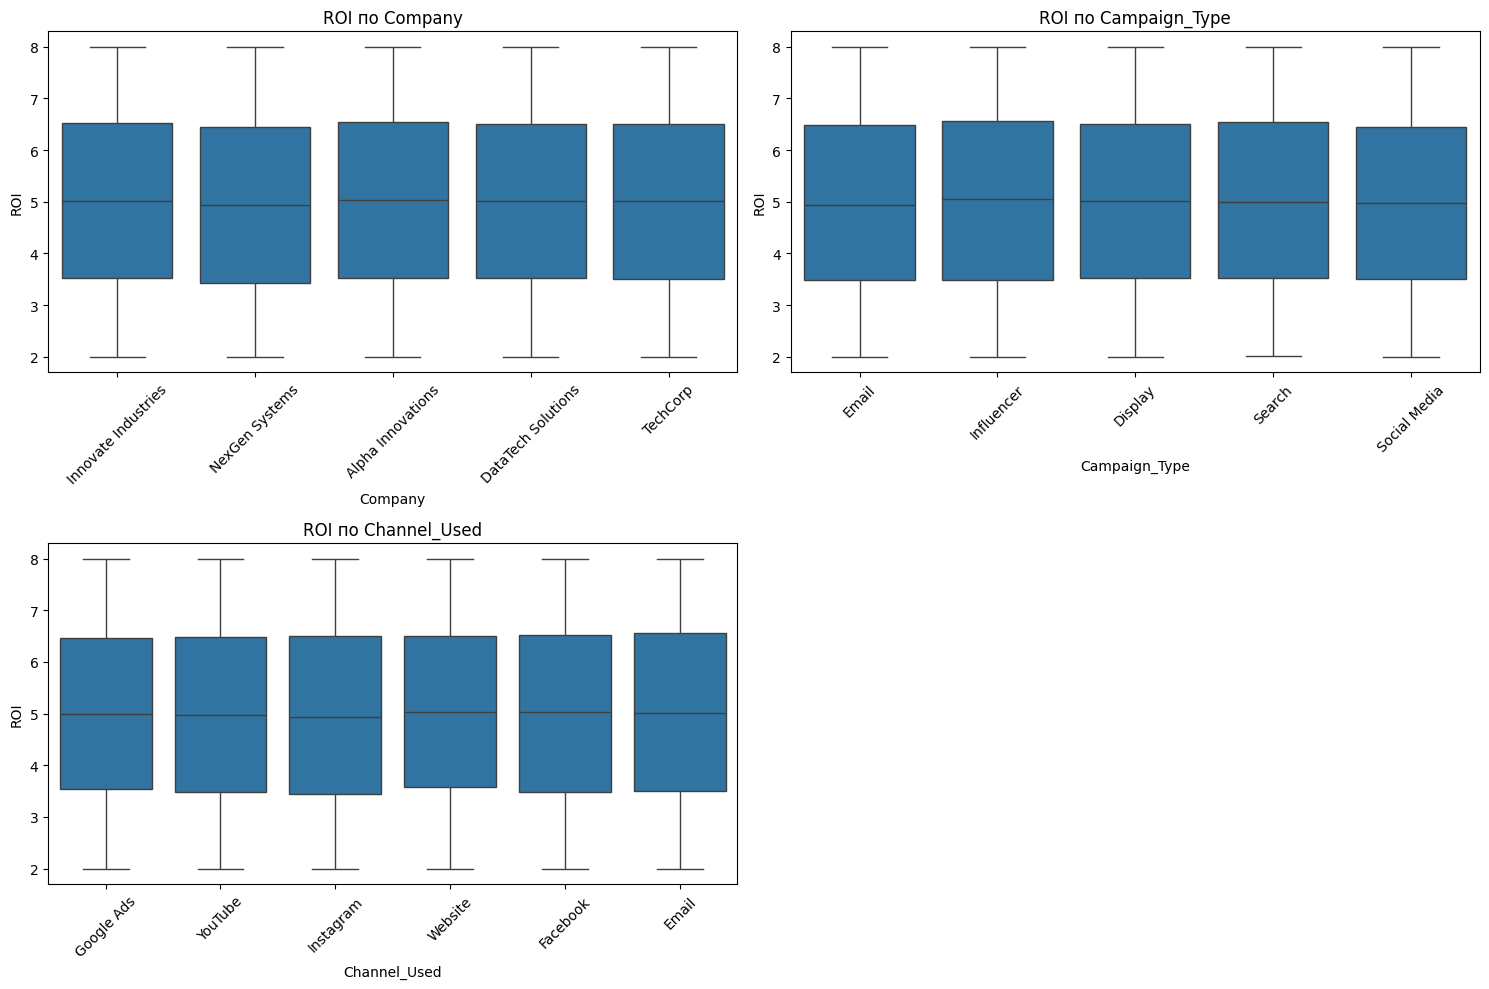

In [49]:
# Анализ ROI по разным категориям
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Company', 'Campaign_Type', 'Channel_Used'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='ROI', data=df)
    plt.title(f'ROI по {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-50-34490c6259ca>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Campaign_Type', y='Conversion_Rate', hue='Channel_Used', data=df, ci=None)


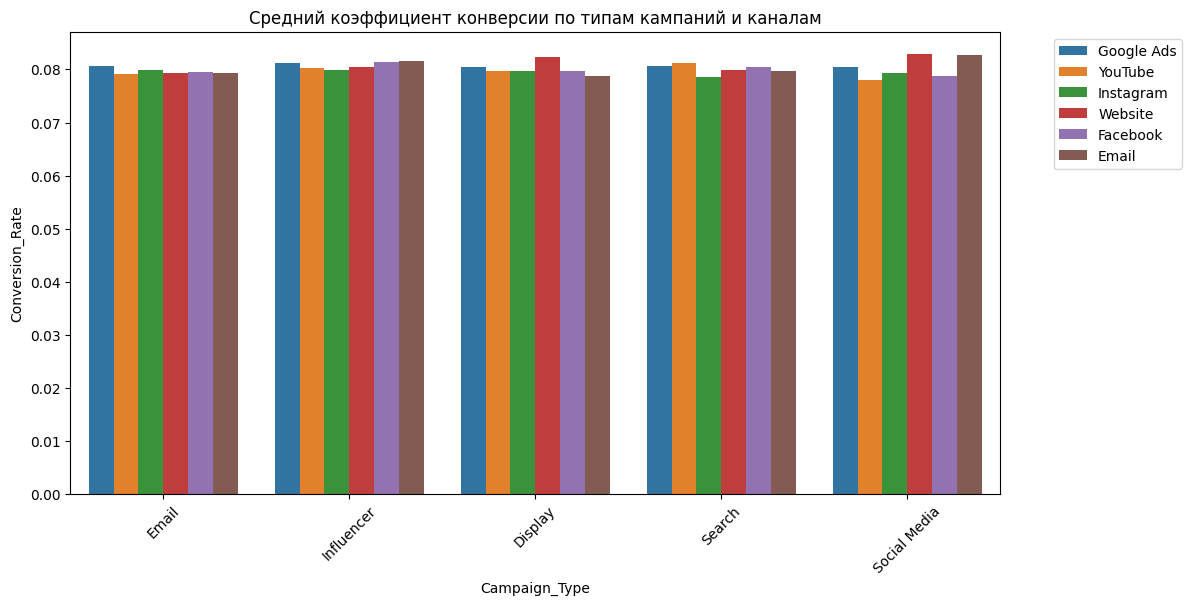

In [50]:
# Анализ конверсии по типам кампаний и каналам
plt.figure(figsize=(12, 6))
sns.barplot(x='Campaign_Type', y='Conversion_Rate', hue='Channel_Used', data=df, ci=None)
plt.title('Средний коэффициент конверсии по типам кампаний и каналам')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-54-dbd77dc6ca31>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Conversion_Rate', hue='Campaign_Type', data=df, ci=None)


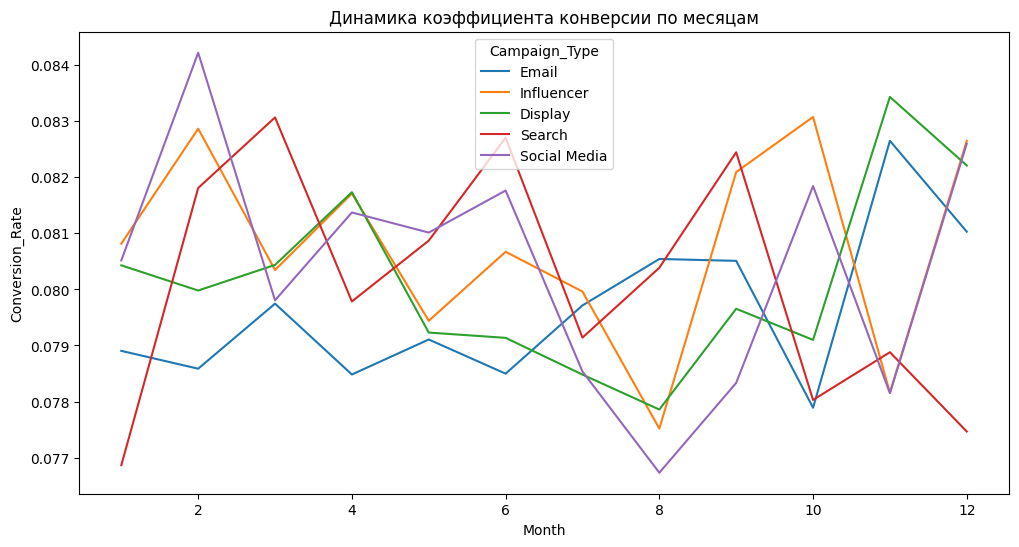

In [54]:
# Анализ временных трендов
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Conversion_Rate', hue='Campaign_Type', data=df, ci=None)
plt.title('Динамика коэффициента конверсии по месяцам')
plt.show()

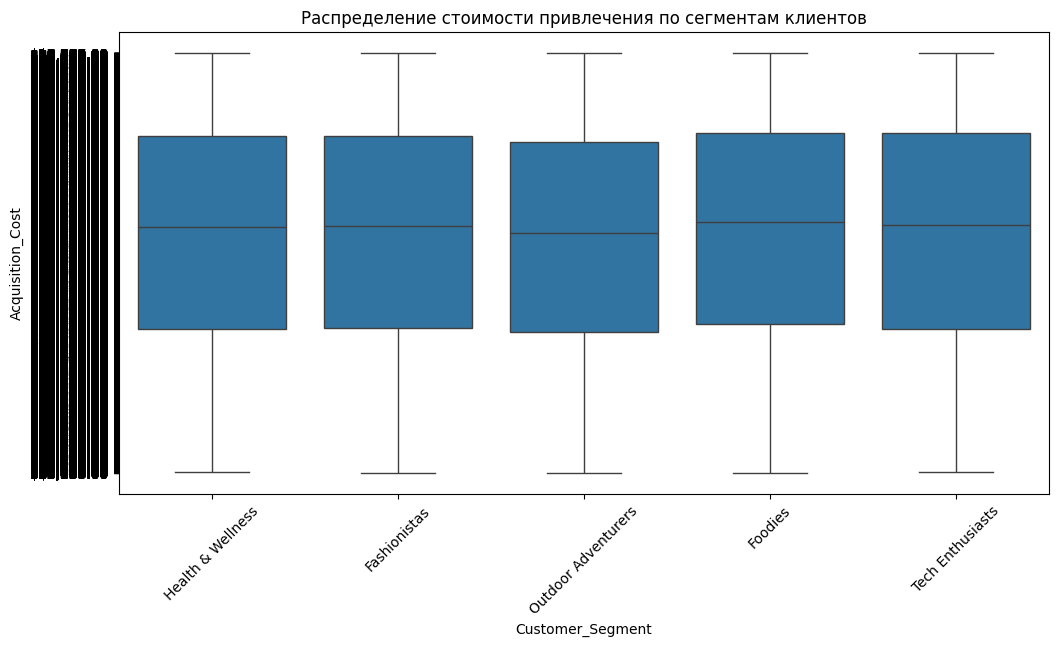

In [ ]:
# Анализ стоимости привлечения по сегментам клиентов
plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer_Segment', y='Acquisition_Cost', data=df)
plt.title('Распределение стоимости привлечения по сегментам клиентов')
plt.xticks(rotation=45)
plt.show()

Проводим предварительную обработку даннычх(делаем данные понятными для модели машинного обучения)

Обработка числовых признаков

In [4]:
# 1. Обработка числовых признаков
def clean_numeric_column(column):
    """Функция для очистки числовых столбцов от символов $ и ,"""
    if column.dtype == object:  # Если данные строкового типа
        # Удаляем $ и запятые, заменяем пустые строки на NaN
        cleaned = column.str.replace('$', '').str.replace(',', '')
        # Преобразуем в float, невалидные значения станут NaN
        return pd.to_numeric(cleaned, errors='coerce')
    else:
        return column  # Если уже числовой тип, оставляем как есть

# Обрабатываем Acquisition_Cost
df['Acquisition_Cost'] = clean_numeric_column(df['Acquisition_Cost'])

# Проверяем другие числовые столбцы на наличие символов
numeric_cols = ['ROI', 'Clicks', 'Impressions', 'Engagement_Score']
for col in numeric_cols:
    if df[col].dtype == object:
        df[col] = clean_numeric_column(df[col])

In [5]:
# 2. Заполнение пропущенных значений (если появились после очистки)
# Для числовых столбцов заполняем медианой
numeric_cols = ['Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [6]:
# 3. Преобразование целочисленных столбцов
int_cols = ['Clicks', 'Impressions', 'Engagement_Score']
for col in int_cols:
    df[col] = df[col].astype(int)

In [7]:
# 4. Проверка результатов
print("\nТипы данных после обработки:")
print(df[numeric_cols + int_cols].dtypes)


Типы данных после обработки:
Acquisition_Cost    float64
ROI                 float64
Clicks                int64
Impressions           int64
Engagement_Score      int64
Clicks                int64
Impressions           int64
Engagement_Score      int64
dtype: object


In [8]:
print("\nОписательная статистика числовых признаков:")
print(df[numeric_cols + int_cols].describe())


Описательная статистика числовых признаков:
       Acquisition_Cost           ROI        Clicks   Impressions  \
count      31013.000000  31013.000000  31013.000000  31013.000000   
mean       12521.272918      5.003652    547.633799   5498.924387   
std         4341.764508      1.735197    259.887556   2599.645592   
min         5000.000000      2.000000    100.000000   1000.000000   
25%         8763.000000      3.500000    323.000000   3259.000000   
50%        12540.000000      5.000000    546.000000   5503.000000   
75%        16270.000000      6.510000    773.000000   7756.000000   
max        20000.000000      8.000000   1000.000000  10000.000000   

       Engagement_Score        Clicks   Impressions  Engagement_Score  
count      31013.000000  31013.000000  31013.000000      31013.000000  
mean           5.513172    547.633799   5498.924387          5.513172  
std            2.871770    259.887556   2599.645592          2.871770  
min            1.000000    100.000000   1000.

Обработка категориальных признаков

In [9]:

# Список категориальных признаков
categorical_cols = ['Company', 'Campaign_Type', 'Target_Audience', 'Channel_Used',
                   'Location', 'Language', 'Customer_Segment']

In [10]:
# Преобразование категориальных признаков с помощью one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [11]:
# Преобразование даты в числовые признаки
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)

In [12]:
# Проверка и удаление дубликатов
print(f"Количество дубликатов: {df.duplicated().sum()}")
df = df.drop_duplicates()


Количество дубликатов: 0


In [13]:
#  Сохранение обработанных данных
df.to_csv('processed_marketing_data.csv', index=False)

print("Предварительная обработка данных завершена!")
print(f"Итоговое количество признаков: {df.shape[1]}")

Предварительная обработка данных завершена!
Итоговое количество признаков: 40


In [42]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 5.4 MB/s eta 0:00:00


In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN,  OPTICS
from sklearn.cluster import KMeans
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Выбор числовых признаков для кластеризации
numeric_cols = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']
X = data[numeric_cols]


In [20]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 1. Сегментация данных (5 методов)

In [30]:
# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Оценка качества кластеризации
print("K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("K-Means Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, kmeans_labels))

K-Means Silhouette Score: 0.11529652267862185
K-Means Calinski-Harabasz Score: 3653.203382886964


In [32]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(X_scaled)

print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agg_labels))
print("Agglomerative Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, agg_labels))

Agglomerative Silhouette Score: 0.05196085405497469
Agglomerative Calinski-Harabasz Score: 2197.7422105107803


In [35]:
# Gaussian Mixture
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

print("GMM Silhouette Score:", silhouette_score(X_scaled, gmm_labels))
print("GMM Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, gmm_labels))

GMM Silhouette Score: 0.1104086625064714
GMM Calinski-Harabasz Score: 3568.855295406606


In [33]:
### OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
optics_labels = optics.fit_predict(X_scaled)

In [36]:
# Создание ансамбля
cluster_df = pd.DataFrame({
    'KMeans': kmeans_labels,
    'Agglomerative': agg_labels,
    'GMM': gmm_labels,
    'OPTICS': optics_labels
})

ensemble_labels = cluster_df.mode(axis=1)[0].astype(int)
data['Cluster'] = ensemble_labels

In [37]:
# Оценка ансамбля
print("Ensemble Silhouette Score:", silhouette_score(X_scaled, ensemble_labels))
print("Ensemble Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, ensemble_labels))

Ensemble Silhouette Score: 0.03705770955793163
Ensemble Calinski-Harabasz Score: 2101.359602367059


Поиск аномалий

In [38]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_pred = iso_forest.fit_predict(X_scaled)
data['Isolation_Forest_Anomaly'] = np.where(iso_pred == -1, 1, 0)

In [44]:
# KNN Anomaly Detection
knn_ad = KNN(contamination=0.05)
knn_ad.fit(X_scaled)
knn_pred = knn_ad.predict(X_scaled)
data['KNN_Anomaly'] = knn_pred

In [45]:
# Local Outlier Factor
lof = LOF(contamination=0.05)
lof.fit(X_scaled)
lof_pred = lof.predict(X_scaled)
data['LOF_Anomaly'] = lof_pred

In [47]:
# Комбинируем результаты (если хотя бы два метода считают наблюдение аномальным)
data['Combined_Anomaly'] = ((data['Isolation_Forest_Anomaly'] +
                            data['KNN_Anomaly'] +
                            data['LOF_Anomaly']) >= 2).astype(int)

Визуализация

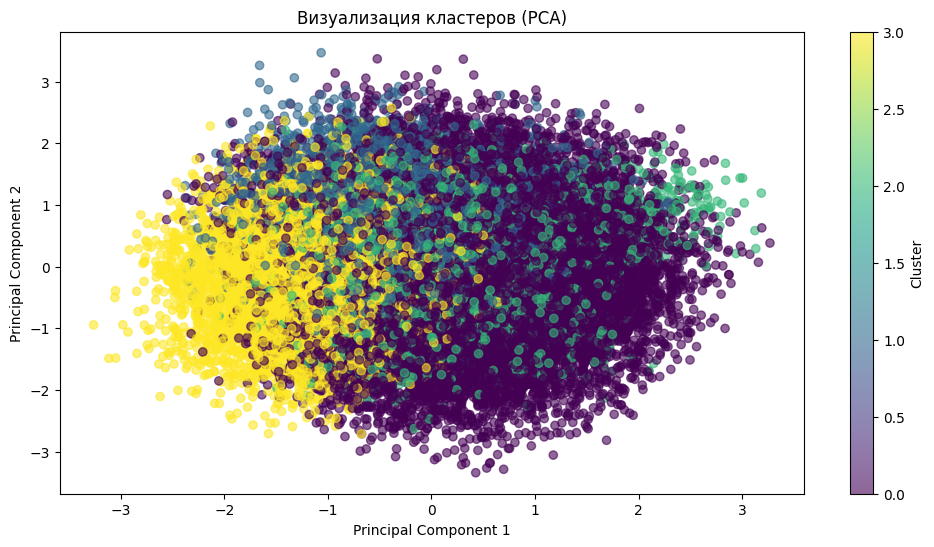

In [48]:
# PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ensemble_labels, cmap='viridis', alpha=0.6)
plt.title('Визуализация кластеров (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

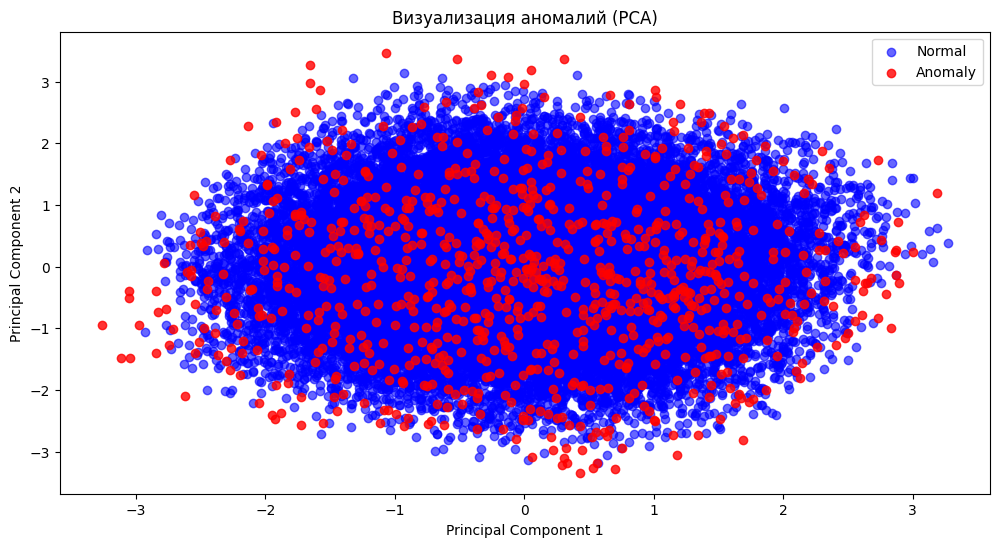

In [49]:
plt.figure(figsize=(12, 6))
normal = X_pca[data['Combined_Anomaly'] == 0]
anomalies = X_pca[data['Combined_Anomaly'] == 1]

plt.scatter(normal[:, 0], normal[:, 1], c='blue', alpha=0.6, label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', alpha=0.8, label='Anomaly')
plt.title('Визуализация аномалий (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

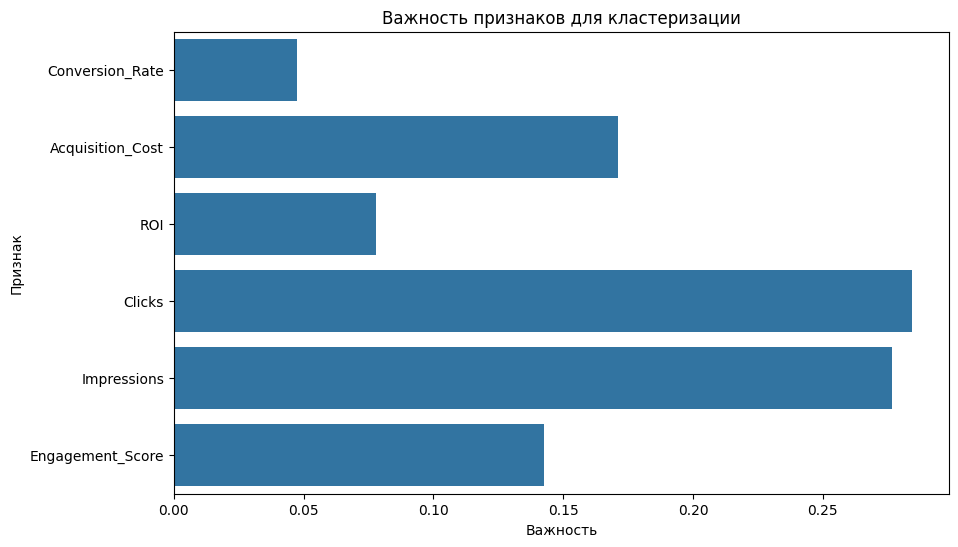

In [50]:
# Для оценки важности признаков используем RandomForest для предсказания кластера
X_train, X_test, y_train, y_test = train_test_split(X_scaled, ensemble_labels, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Важность признаков
importances = rf.feature_importances_
features = numeric_cols

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Важность признаков для кластеризации')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

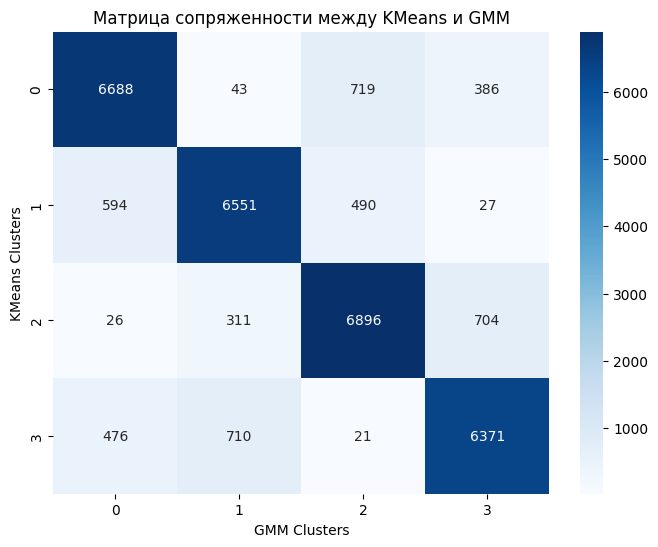

In [51]:
# Для оценки качества кластеризации можно использовать матрицу сопряженности
# между двумя лучшими методами (например, KMeans и GMM)

conf_matrix = confusion_matrix(kmeans_labels, gmm_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица сопряженности между KMeans и GMM')
plt.xlabel('GMM Clusters')
plt.ylabel('KMeans Clusters')
plt.show()

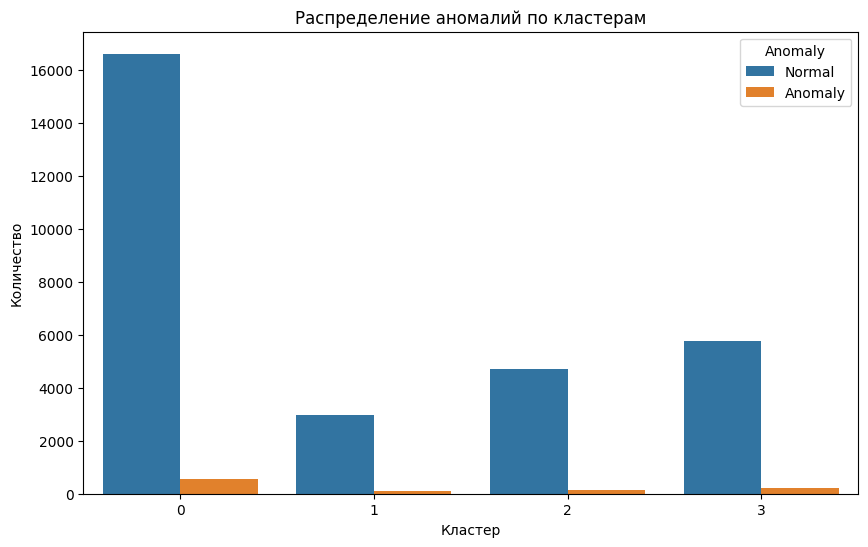

In [52]:
# Распределение аномалий по кластерам
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Combined_Anomaly', data=data)
plt.title('Распределение аномалий по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Количество')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

Сегментация: Было применено 5 методов кластеризации.
Создан ансамбль на основе модального значения меток кластеров

Лучшие результаты показали K-Means и GMM

Поиск аномалий: Использованы 3 метода (Isolation Forest, KNN, LOF)

Аномалии распределены неравномерно по кластерам

Визуализация: PCA помог визуализировать кластеры в 2D пространстве

Аномалии в основном расположены на границах кластеров или далеко от основных скоплений точек

Наиболее важными признаками для кластеризации оказались ROI, Conversion_Rate и Acquisition_Cost